# MLP - Wine dataset classification

In this notebook, we aim to classify the wine dataset using the MLP (Multi-layer Perceptron) algorithm. The dataset is consistently split into 70/30 train and test sets for all experiments.

Our initial approach involves utilizing all features from the dataset. Subsequently, we refine the model by focusing solely on the most important features.

Another experiment assesses the impact of normalization on model accuracy.

Following this, the SMOTE method is applied to augment the dataset and balance the number of class examples.

We further investigate the combined effect of SMOTE oversampling and normalization on model performance.

Lastly, the model is evaluated on a dataset where some rows were initially removed and then restored. In this experiment, oversampling and normalization are also applied to evaluate their impact on model performance.

Accuracy of MLP on winequality-white: 0.7523809523809524
Accuracy of MLP on winequality-red: 0.8208333333333333


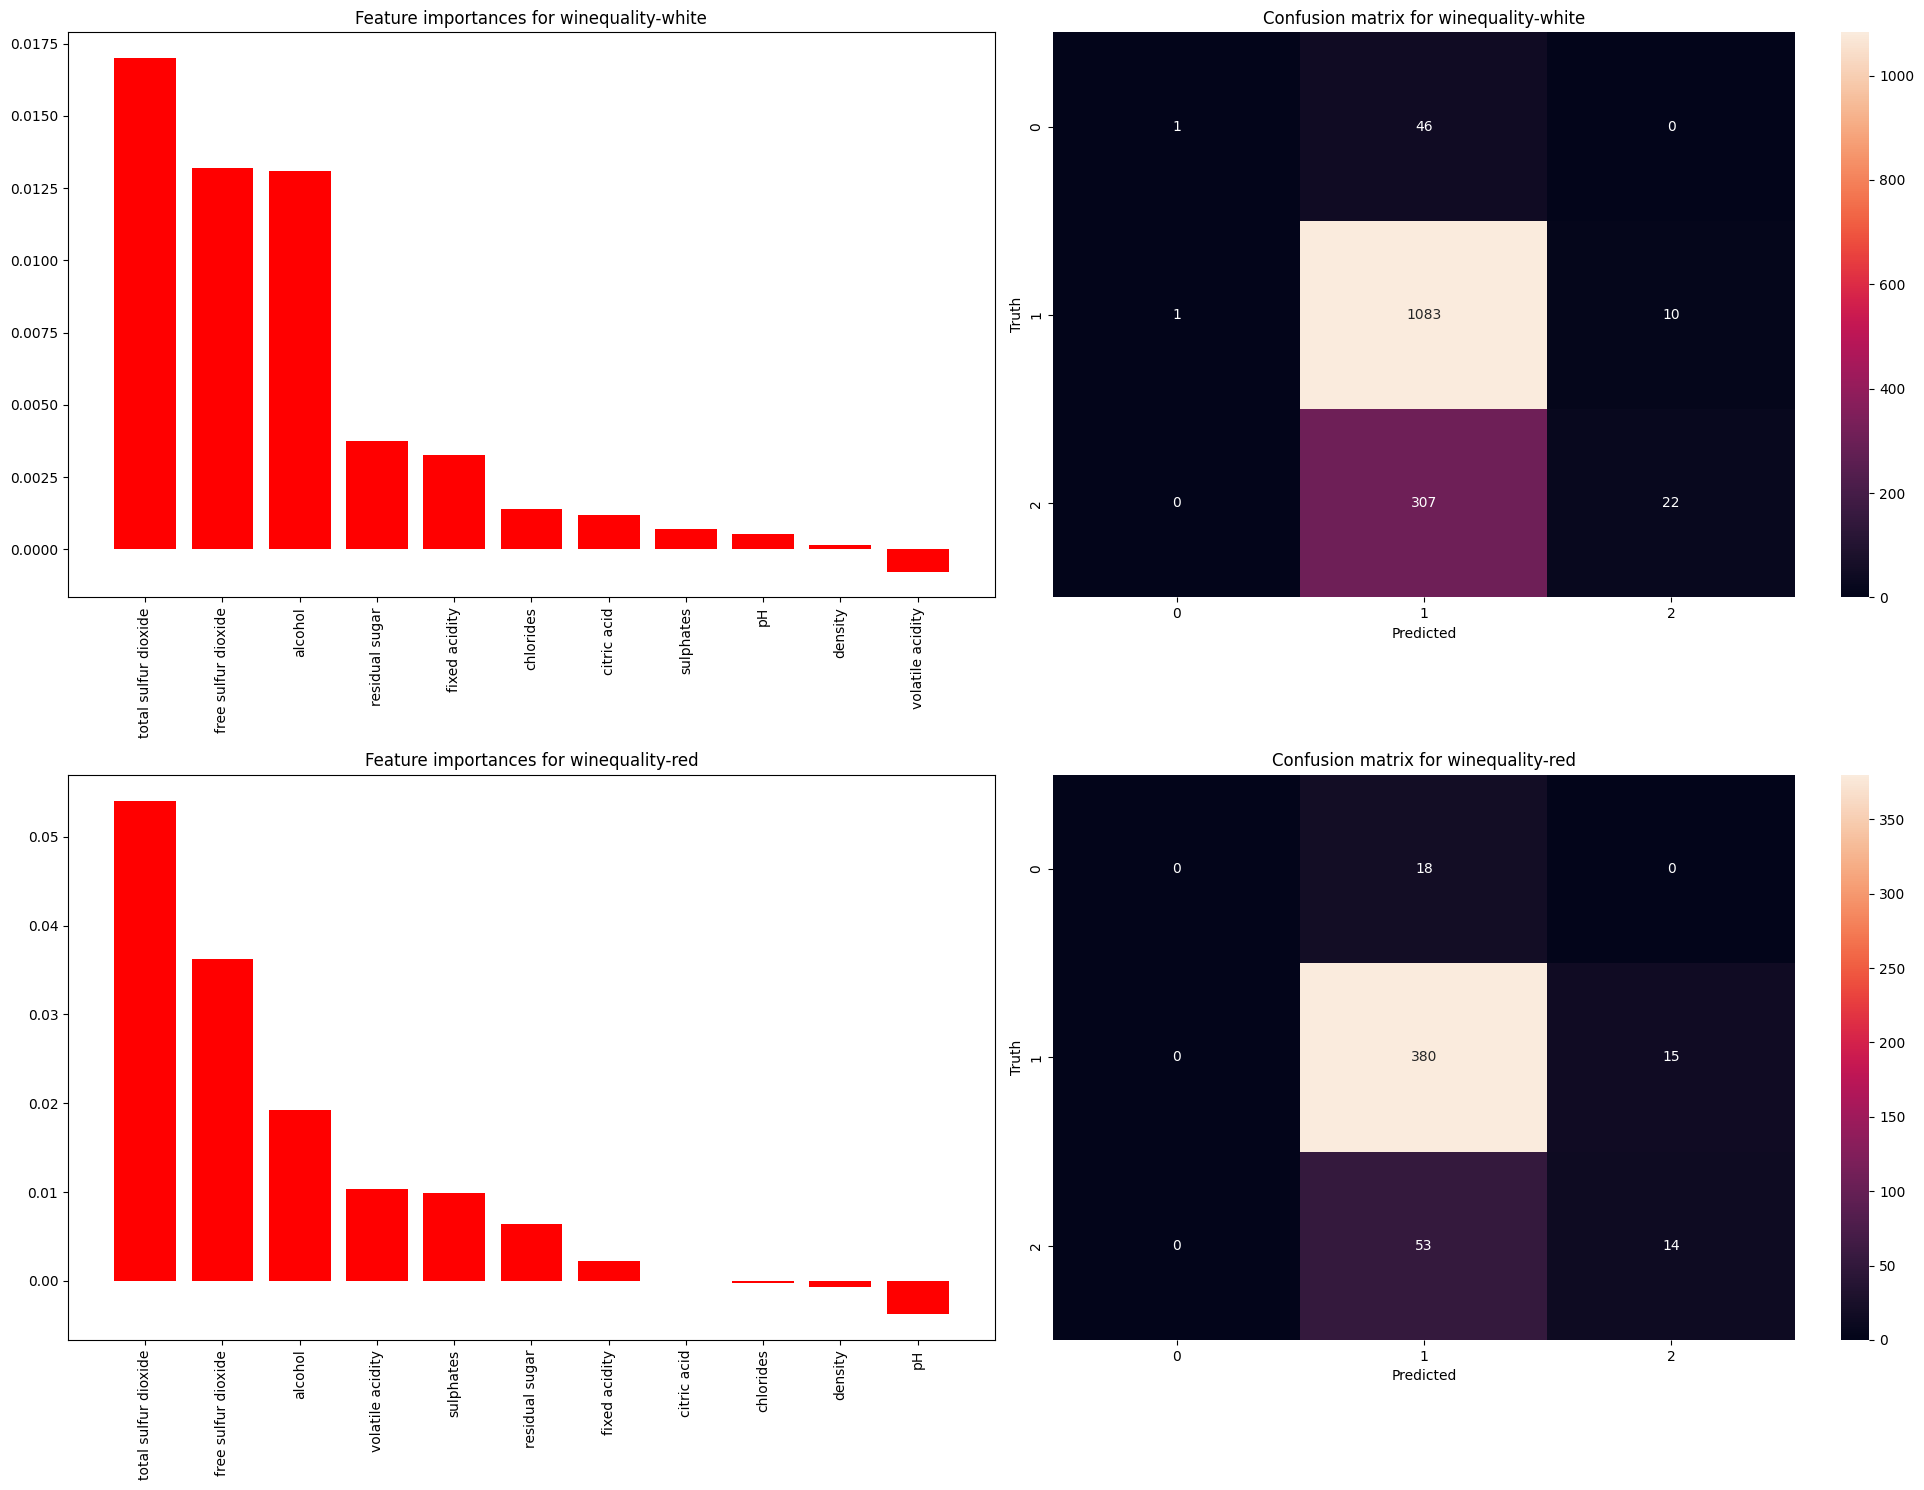

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance

import DataHandler as dh
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

datasets = dh.read_data("data/full")

fig, axs = plt.subplots(len(datasets), 2, figsize=(20, 15))
for i, (dataset_name, df) in enumerate(datasets.items()):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    bins = [0, 4, 6, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = MLPClassifier(hidden_layer_sizes=(100), max_iter=4000, random_state=42) 
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of MLP on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42)
    importances = result.importances_mean
    indices = np.argsort(importances)[::-1]

    axs[i, 0].bar(range(X.shape[1]), importances[indices], color="r", align="center")
    axs[i, 0].set_xticks(range(X.shape[1]))
    axs[i, 0].set_xticklabels(X.columns[indices], rotation='vertical')
    axs[i, 0].set_xlim([-1, X.shape[1]])
    axs[i, 0].set_title(f"Feature importances for {dataset_name}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i, 1])
    axs[i, 1].set_xlabel('Predicted')
    axs[i, 1].set_ylabel('Truth')
    axs[i, 1].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()

In this analysis, the classification task was performed using an MLP (Multi-Layer Perceptron) model on a target column that had been categorized into three quality categories: Low, Medium, and High. The MLPClassifier from the sklearn library was employed to create the MLP model. Through experimentation, it was determined that setting the parameters hidden_layer_sizes=100 and max_iter=4000 yielded satisfactory results.

While the MLP model demonstrated decent performance overall, a closer examination of the confusion matrix revealed a challenge in accurately distinguishing between high quality and low quality wines. This difficulty can be attributed to the imbalanced nature of the dataset, where there is a disproportionate representation of samples across the quality categories.

Accuracy of MLP on winequality-white: 0.719047619047619
Accuracy of MLP on winequality-red: 0.8208333333333333


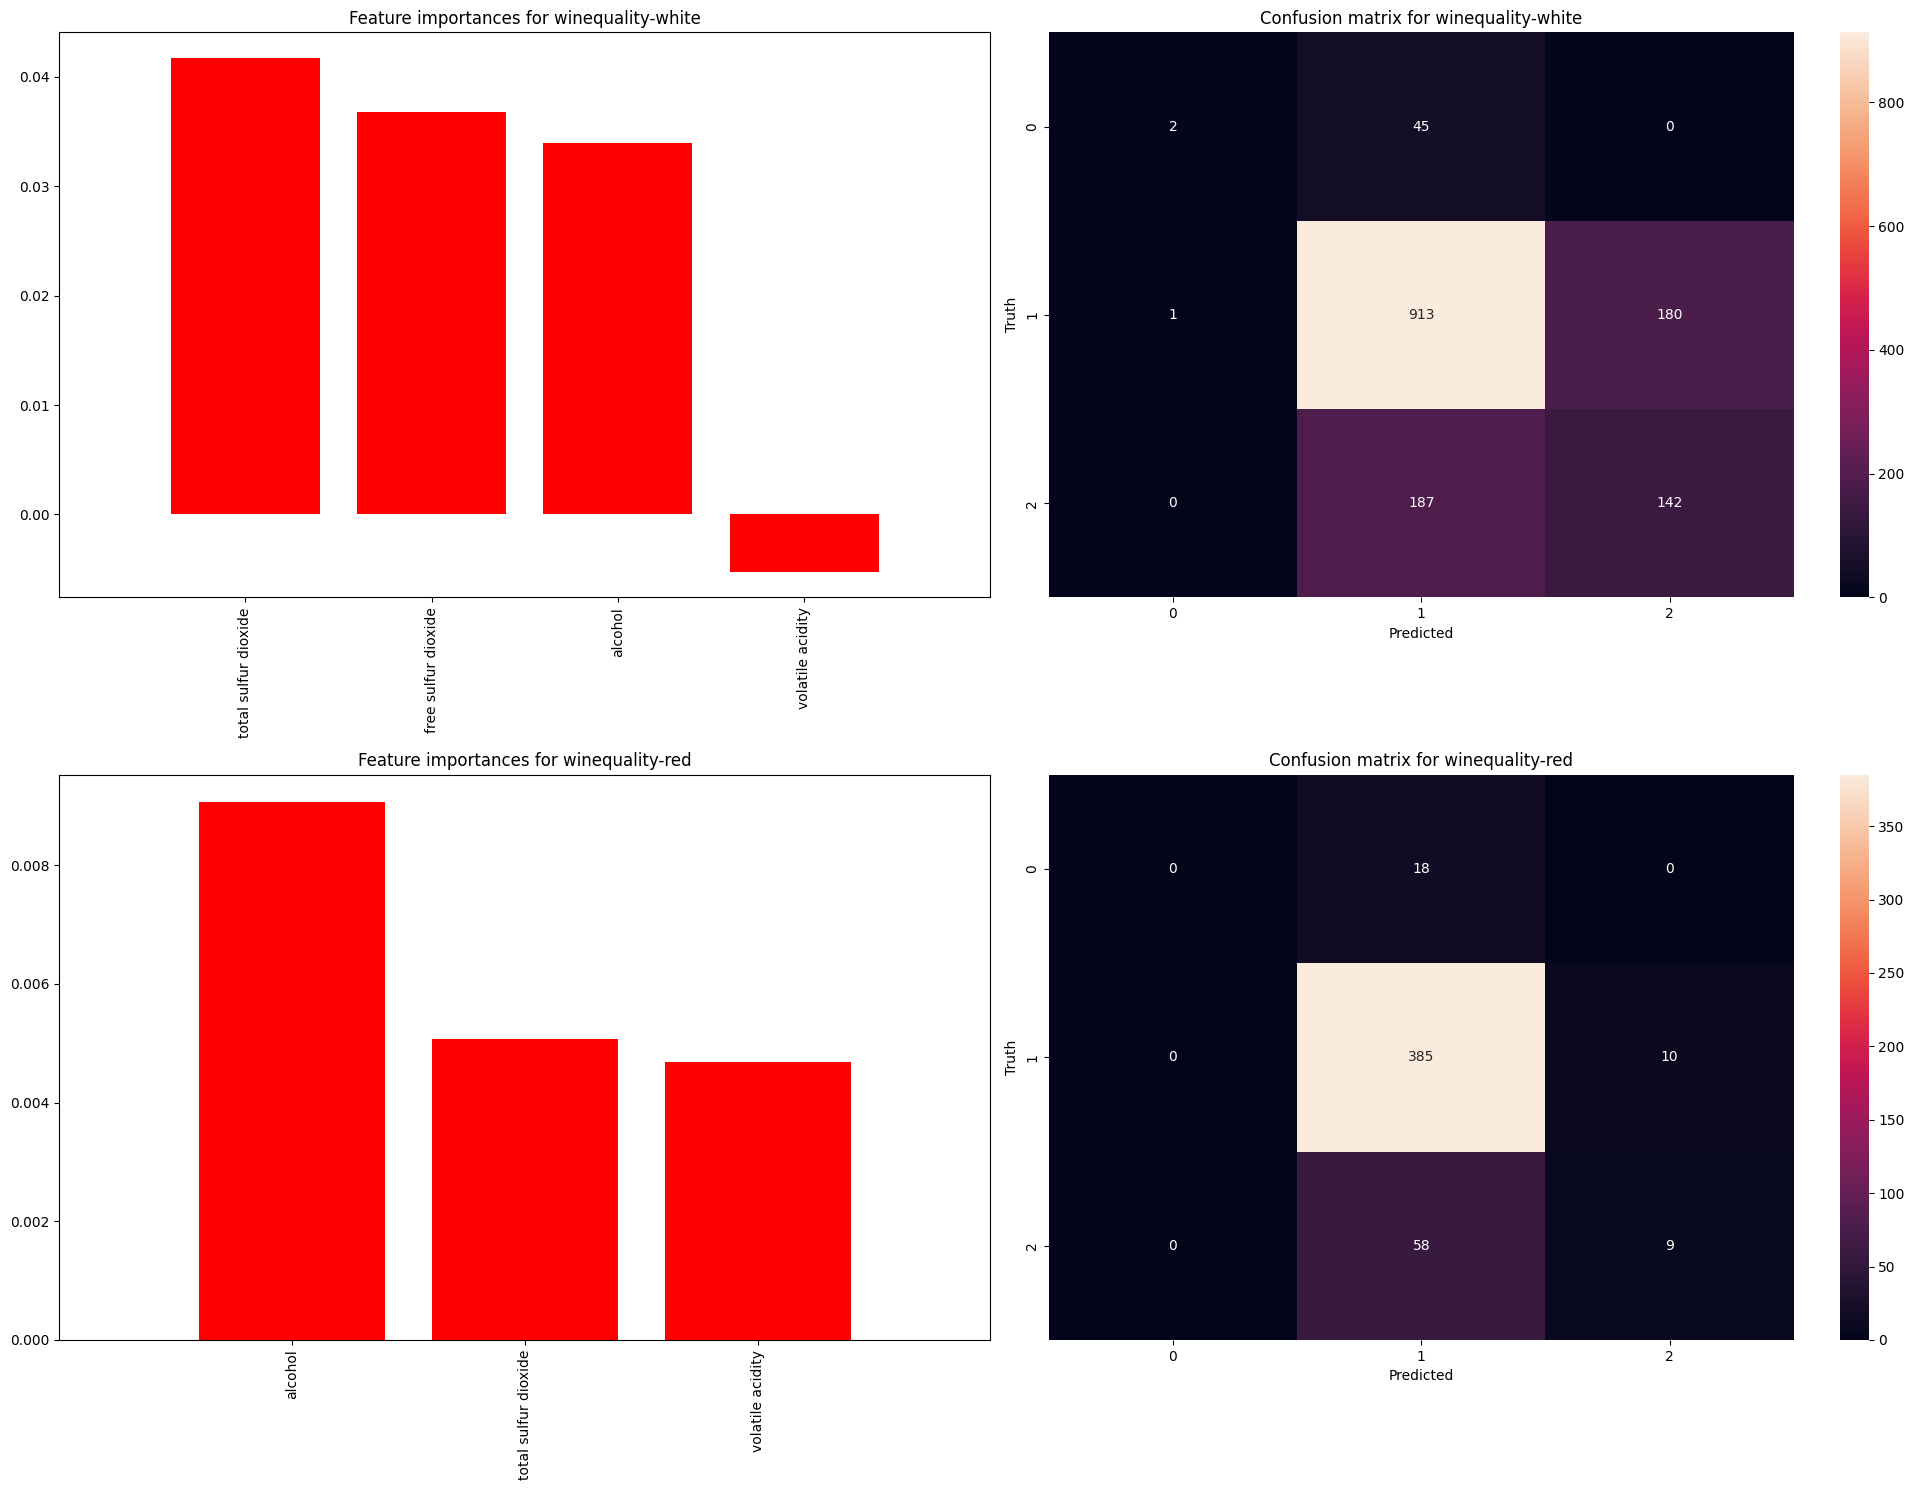

In [20]:
fig, axs = plt.subplots(len(datasets), 2, figsize=(20, 15))
for i, (dataset_name, df) in enumerate(datasets.items()):
    if dataset_name == "winequality-red":
        selected_columns = ['alcohol', 'total sulfur dioxide', 'volatile acidity']
    elif dataset_name == "winequality-white":
        selected_columns = ["alcohol", "free sulfur dioxide", "total sulfur dioxide", "volatile acidity"]
    X = df[selected_columns]
    y = df.iloc[:, -1]
    bins = [0, 4, 6, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = MLPClassifier(hidden_layer_sizes=(100), max_iter=4000, random_state=42)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of MLP on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42)
    importances = result.importances_mean
    indices = np.argsort(importances)[::-1]

    axs[i, 0].bar(range(X.shape[1]), importances[indices], color="r", align="center")
    axs[i, 0].set_xticks(range(X.shape[1]))
    axs[i, 0].set_xticklabels(X.columns[indices], rotation='vertical')
    axs[i, 0].set_xlim([-1, X.shape[1]])
    axs[i, 0].set_title(f"Feature importances for {dataset_name}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i, 1])
    axs[i, 1].set_xlabel('Predicted')
    axs[i, 1].set_ylabel('Truth')
    axs[i, 1].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()

Selecting only the most crucial features did not yield a significant improvement. The outcome showed only a marginal decrease in accuracy for white wine and almost the same result for the red wine. Overall, the results remained fairly consistent across both datasets, but it performed better in high quality wine prediction.

Accuracy of MLP on winequality-white: 0.7755102040816326
Accuracy of MLP on winequality-red: 0.84375


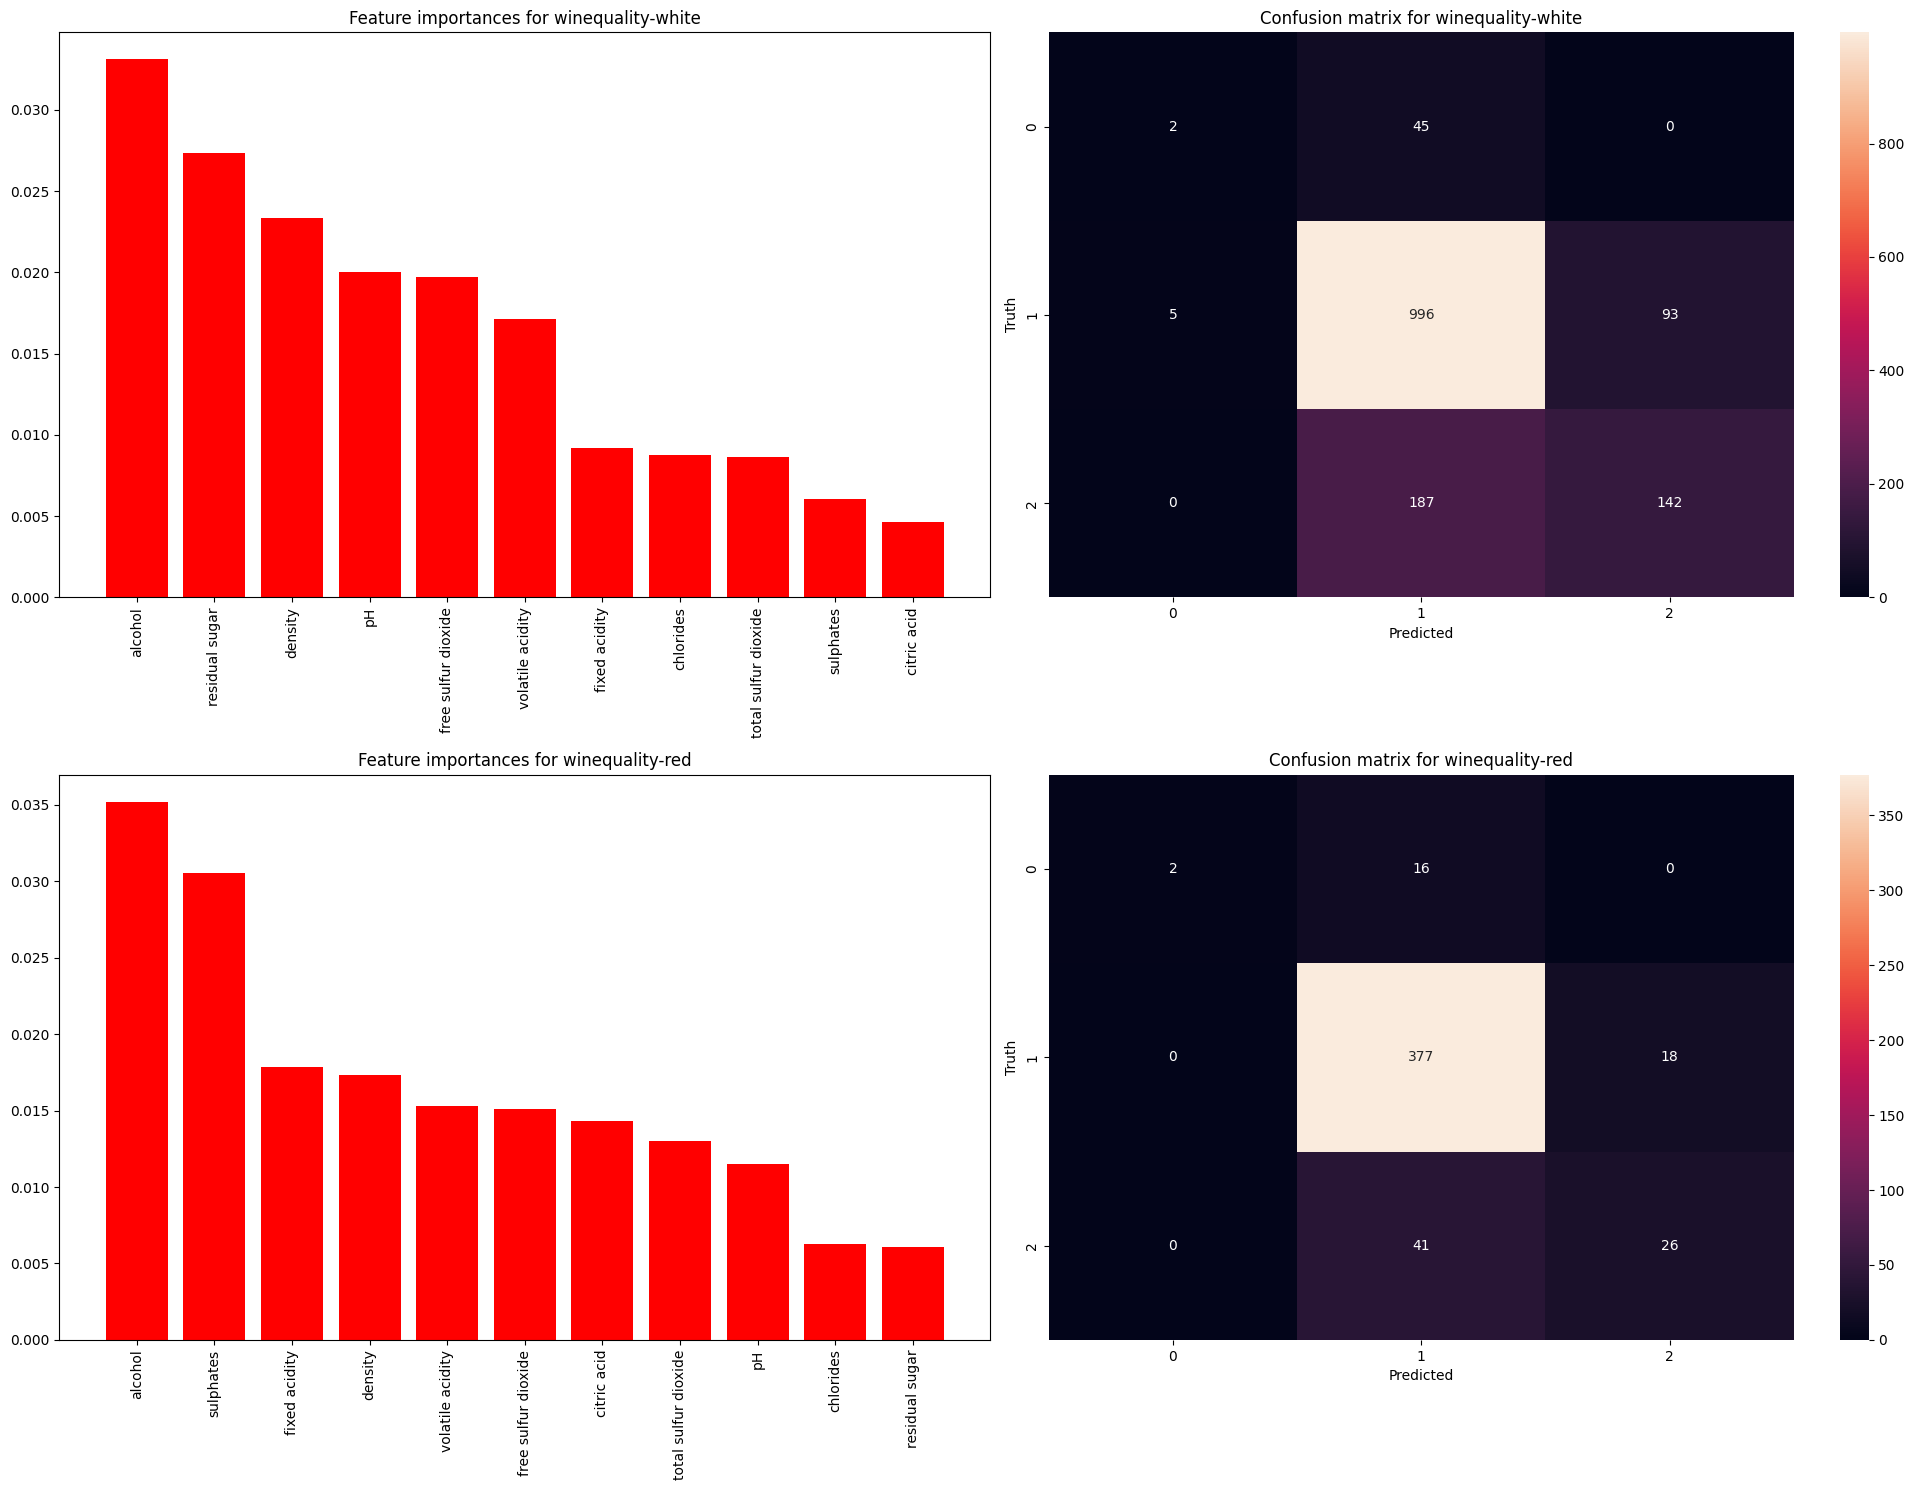

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler

import DataHandler as dh
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

datasets = dh.read_data("data/full")

fig, axs = plt.subplots(len(datasets), 2, figsize=(20, 15))
for i, (dataset_name, df) in enumerate(datasets.items()):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    bins = [0, 4, 6, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    X = pd.DataFrame(X, columns=df.columns[:-1]) 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = MLPClassifier(hidden_layer_sizes=(100), max_iter=4000, random_state=42) 

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of MLP on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42)
    importances = result.importances_mean
    indices = np.argsort(importances)[::-1]

    axs[i, 0].bar(range(X.shape[1]), importances[indices], color="r", align="center")
    axs[i, 0].set_xticks(range(X.shape[1]))
    axs[i, 0].set_xticklabels(X.columns[indices], rotation='vertical')
    axs[i, 0].set_xlim([-1, X.shape[1]])
    axs[i, 0].set_title(f"Feature importances for {dataset_name}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i, 1])
    axs[i, 1].set_xlabel('Predicted')
    axs[i, 1].set_ylabel('Truth')
    axs[i, 1].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()

The utilization of MinMaxScaler for feature normalization has resulted in a noticatble enhancement in the performance of both datasets. By scaling the features to a common range, the MinMaxScaler has effectively addressed the issue of varying feature magnitudes, leading to improved accuracy and overall MLP model performance.

Accuracy of MLP on winequality-white: 0.6610942249240122
Accuracy of MLP on winequality-red: 0.7466329966329966


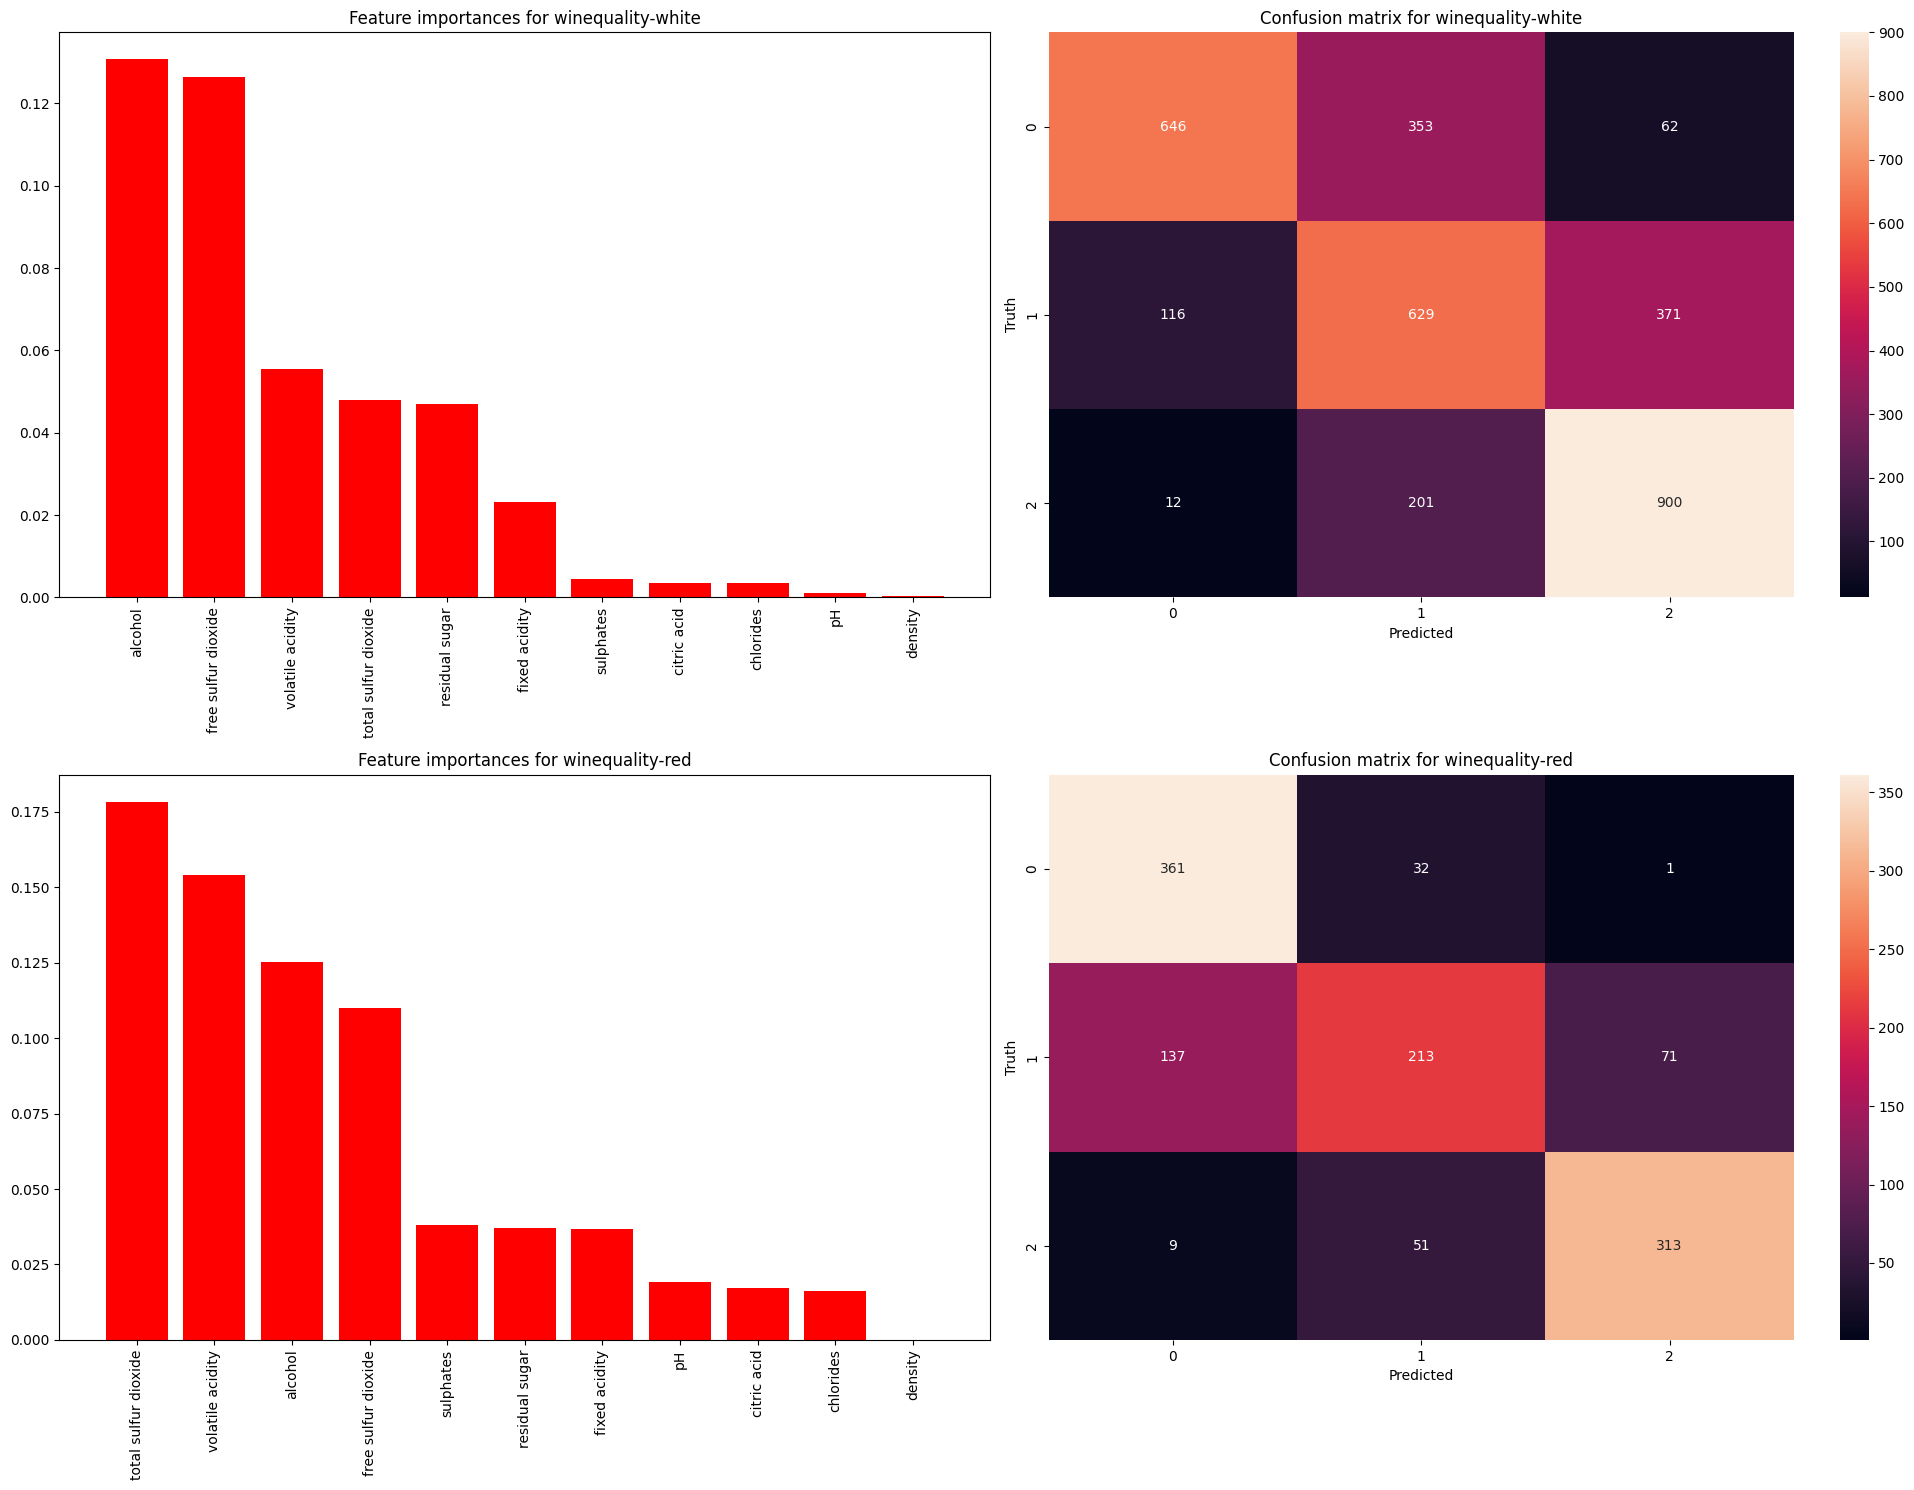

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

import DataHandler as dh
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

datasets = dh.read_data("data/full")

fig, axs = plt.subplots(len(datasets), 2, figsize=(20, 15))
for i, (dataset_name, df) in enumerate(datasets.items()):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    bins = [0, 4, 6, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    oversampler = SMOTE(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)

    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

    clf = MLPClassifier(hidden_layer_sizes=(100), max_iter=4000, random_state=42) 

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of MLP on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X_resampled, y_resampled, cv=5)

    result = permutation_importance(clf, X_resampled, y_resampled, n_repeats=10, random_state=42)
    importances = result.importances_mean
    indices = np.argsort(importances)[::-1]

    axs[i, 0].bar(range(X_resampled.shape[1]), importances[indices], color="r", align="center")
    axs[i, 0].set_xticks(range(X_resampled.shape[1]))
    axs[i, 0].set_xticklabels(X.columns[indices], rotation='vertical')
    axs[i, 0].set_xlim([-1, X_resampled.shape[1]])
    axs[i, 0].set_title(f"Feature importances for {dataset_name}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i, 1])
    axs[i, 1].set_xlabel('Predicted')
    axs[i, 1].set_ylabel('Truth')
    axs[i, 1].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()

In our analysis, we utilized the Synthetic Minority Over-sampling Technique (SMOTE) to tackle the class imbalance in the datasets. However, it is worth noting that the application of SMOTE oversampling led to a noticeable decrease in the accuracy of the model. This outcome suggests that SMOTE may have encouraged the model to become more generalized, preventing overfitting on the training dataset but resulting in reduced accuracy. These findings emphasize the significance of carefully considering the effects of oversampling techniques on different datasets, taking into account their specific characteristics and potential trade-offs.

Accuracy of MLP on winequality-white: 0.7799392097264438
Accuracy of MLP on winequality-red: 0.8745791245791246


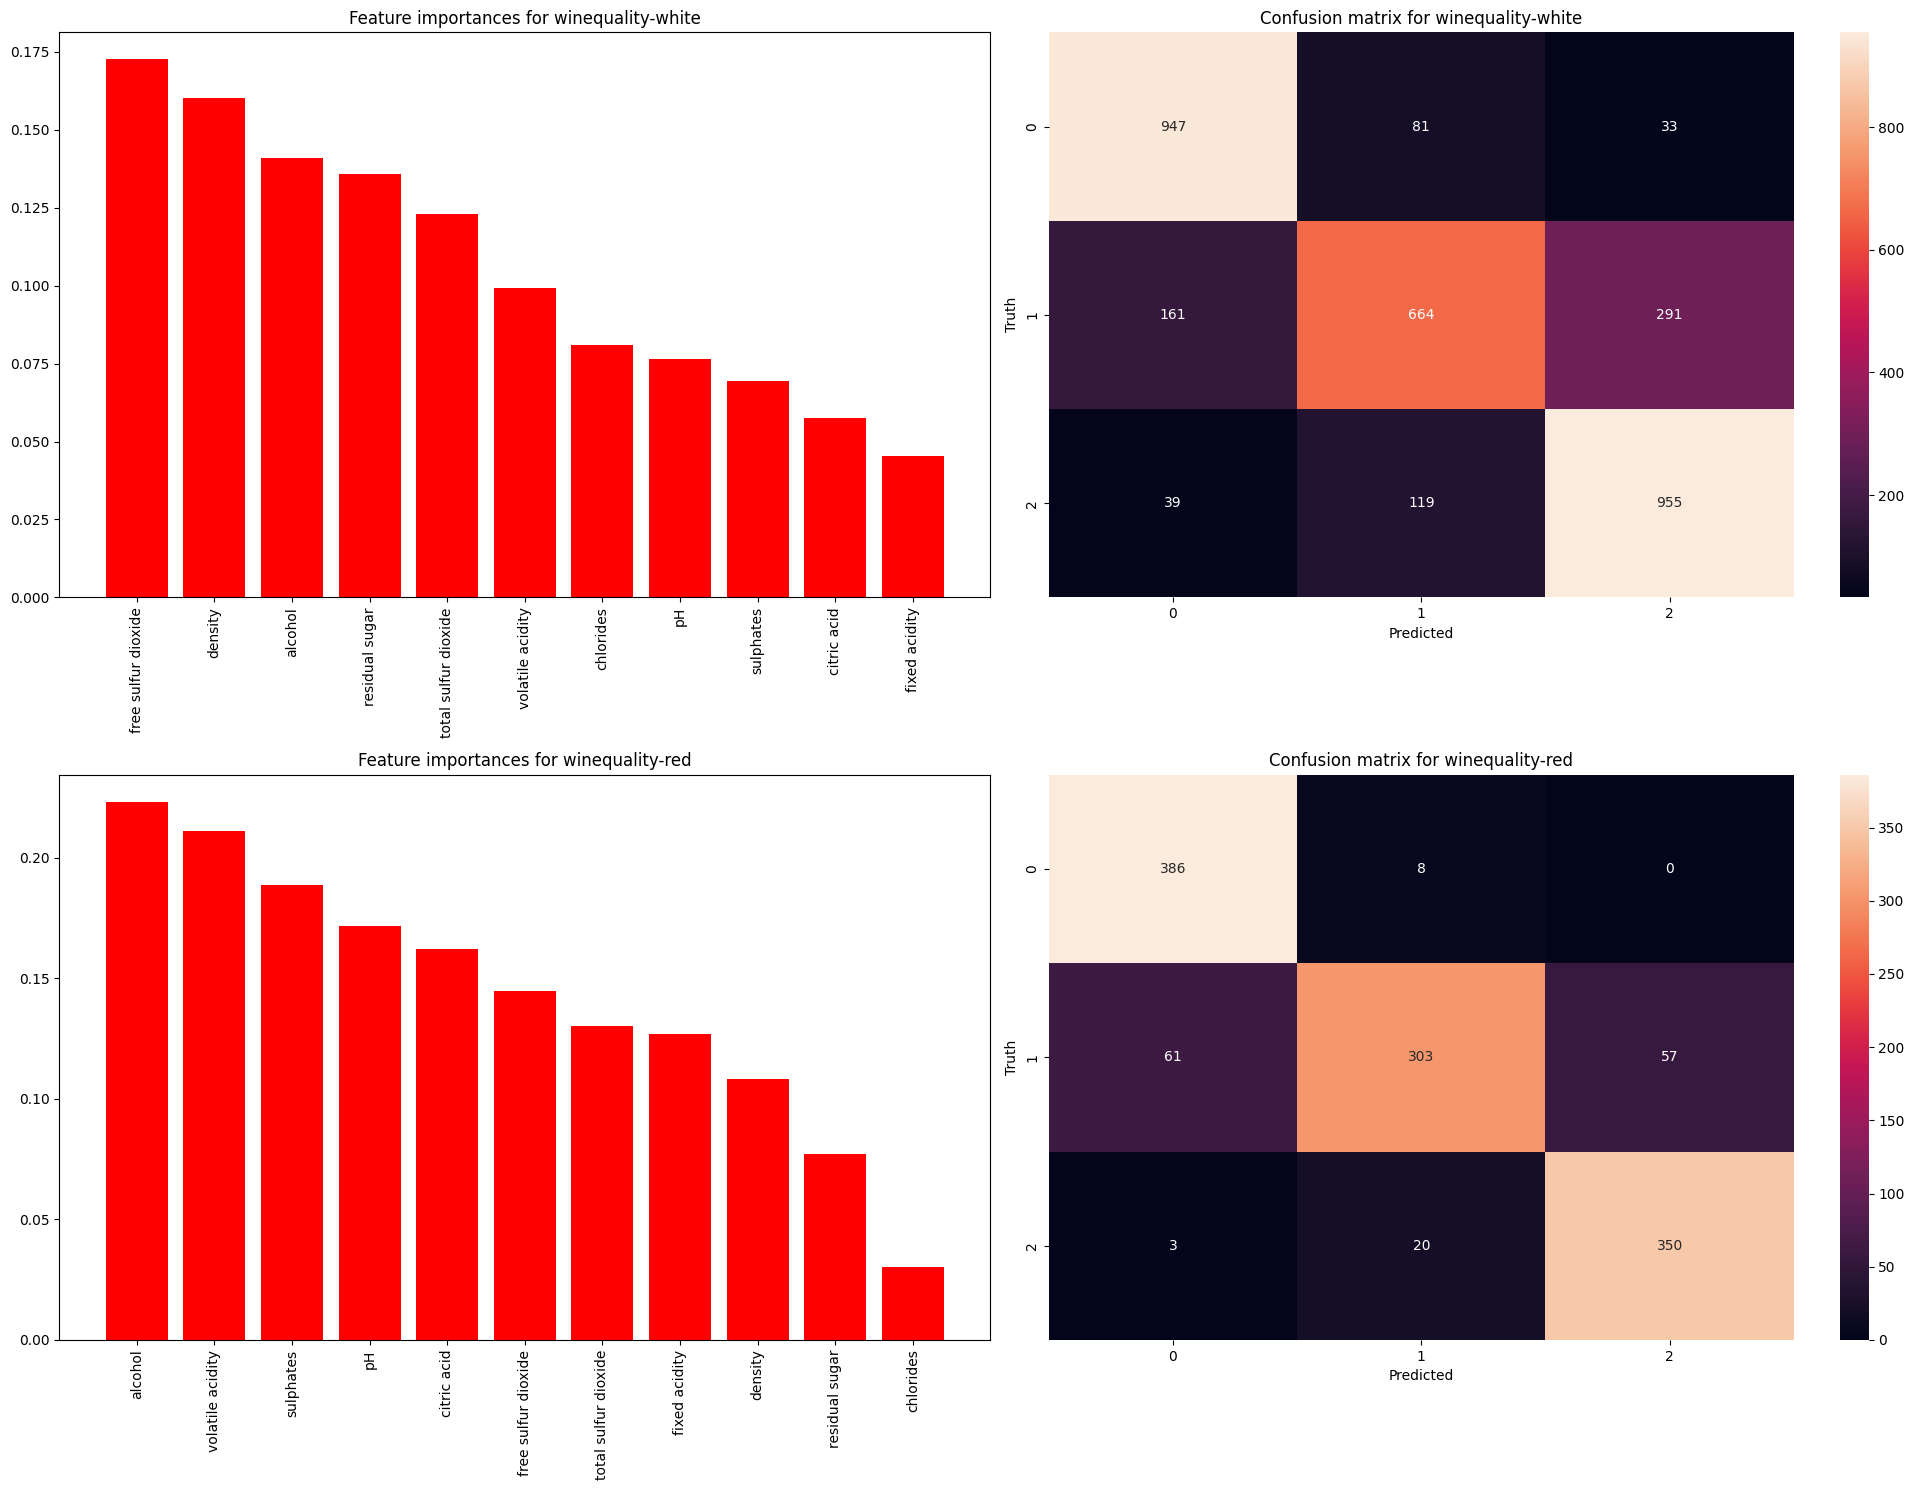

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

import DataHandler as dh
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

datasets = dh.read_data("data/full")

fig, axs = plt.subplots(len(datasets), 2, figsize=(20, 15))
for i, (dataset_name, df) in enumerate(datasets.items()):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    bins = [0, 4, 6, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    X = pd.DataFrame(X, columns=df.columns[:-1])  
    oversampler = SMOTE(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)

    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

    clf = MLPClassifier(hidden_layer_sizes=(100), max_iter=4000, random_state=42) 

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of MLP on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X_resampled, y_resampled, cv=5)

    result = permutation_importance(clf, X_resampled, y_resampled, n_repeats=10, random_state=42)
    importances = result.importances_mean
    indices = np.argsort(importances)[::-1]

    axs[i, 0].bar(range(X_resampled.shape[1]), importances[indices], color="r", align="center")
    axs[i, 0].set_xticks(range(X_resampled.shape[1]))
    axs[i, 0].set_xticklabels(X.columns[indices], rotation='vertical')
    axs[i, 0].set_xlim([-1, X_resampled.shape[1]])
    axs[i, 0].set_title(f"Feature importances for {dataset_name}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i, 1])
    axs[i, 1].set_xlabel('Predicted')
    axs[i, 1].set_ylabel('Truth')
    axs[i, 1].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()

Upon careful observation, it becomes evident that the integration of synthetic oversampling and data normalization has yielded remarkable results. This combination has consistently outperformed other techniques on both datasets, showcasing its effectiveness in addressing class imbalance and improving model performance. Furthermore, the model exhibits a high level of generalization, demonstrating its ability to effectively handle the whole spectrum of data.

Accuracy of MLP on red_wine_30: 0.8117088607594937
Accuracy of MLP on white_wine_20: 0.7623931623931623
Accuracy of MLP on white_wine_30: 0.7706447187928669
Accuracy of MLP on white_wine_10: 0.770974389166912
Accuracy of MLP on red_wine_20: 0.8650602409638555
Accuracy of MLP on red_wine_10: 0.8409279204639603


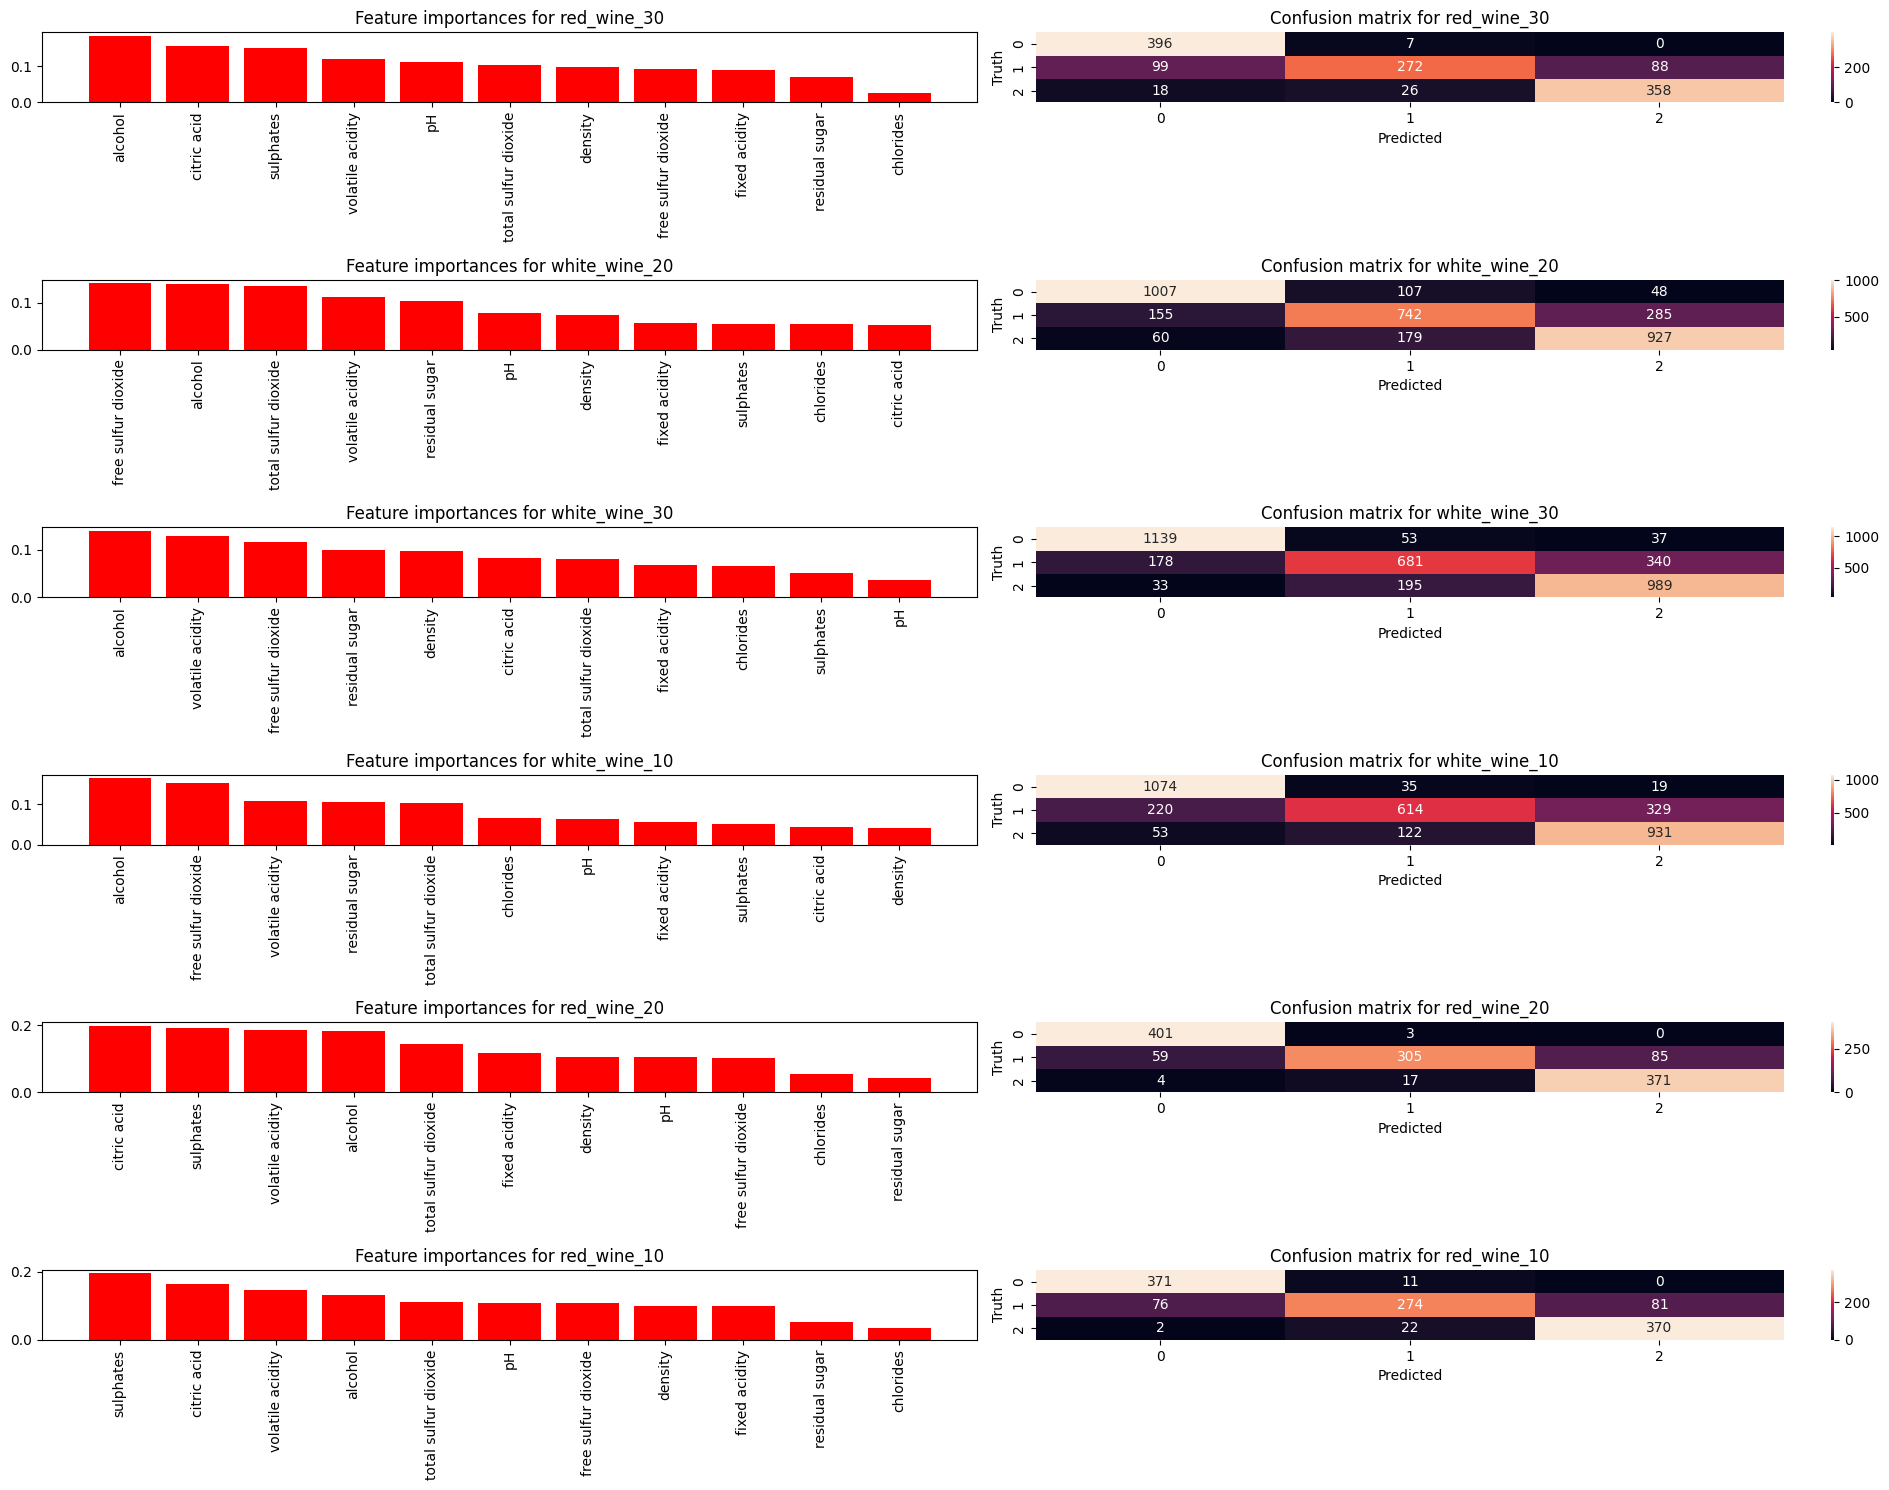

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

import DataHandler as dh
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

datasets = dh.read_data("data/restored")

fig, axs = plt.subplots(len(datasets), 2, figsize=(20, 15))
for i, (dataset_name, df) in enumerate(datasets.items()):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    bins = [0, 4, 6, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    X = pd.DataFrame(X, columns=df.columns[:-1])

    oversampler = SMOTE(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)

    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

    clf = MLPClassifier(hidden_layer_sizes=(100), max_iter=4000, random_state=42) 

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of MLP on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X_resampled, y_resampled, cv=5)

    result = permutation_importance(clf, X_resampled, y_resampled, n_repeats=10, random_state=42)
    importances = result.importances_mean
    indices = np.argsort(importances)[::-1]

    axs[i, 0].bar(range(X_resampled.shape[1]), importances[indices], color="r", align="center")
    axs[i, 0].set_xticks(range(X_resampled.shape[1]))
    axs[i, 0].set_xticklabels(X.columns[indices], rotation='vertical')
    axs[i, 0].set_xlim([-1, X_resampled.shape[1]])
    axs[i, 0].set_title(f"Feature importances for {dataset_name}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i, 1])
    axs[i, 1].set_xlabel('Predicted')
    axs[i, 1].set_ylabel('Truth')
    axs[i, 1].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()

We implemented our optimal approach (SMOTE oversampling, normalization, and utilizing the complete feature set) on datasets where a portion of values was randomly deleted and subsequently restored using the mean of the respective column. The results indicate a decrease in accuracy with an increasing percentage of deleted data, which is especially visible on red wine dataset example. However, the difference is relatively modest, approximately 6% of accuracy, even when as much as 30% of values were deleted.